<a href="https://colab.research.google.com/github/devpatel0005/Baseball-Player-Salary-Prediction/blob/main/Baseball_player_salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/devpatel0005/Baseball-Player-Salary-Prediction/refs/heads/main/Player%20-%20Player.csv')

In [48]:
df.sample(5)

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
231,-Phil Bradley,526,163,12,88,50,77,4,1556,470,...,245,167,174,A,W,250,11,1,750.0,A
46,-Chris Brown,416,132,7,57,49,33,3,932,273,...,113,121,80,N,W,73,177,18,215.0,N
311,-Vance Law,360,81,5,37,44,37,7,2268,566,...,279,257,246,N,E,170,284,3,525.0,N
302,-Tony Perez,200,51,2,14,29,25,23,9778,2732,...,1272,1652,925,N,W,398,29,7,NaN,N
255,-Rick Leach,246,76,5,35,39,13,6,912,234,...,102,96,80,A,E,44,0,1,250.0,A


In [ ]:
df.info()

In [50]:
df.isnull().mean()

,0
Unnamed: 0,0.00000
AtBat,0.00000
Hits,0.00000
HmRun,0.00000
Runs,0.00000
RBI,0.00000
Walks,0.00000
Years,0.00000
CAtBat,0.00000
CHits,0.00000


In [51]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [52]:
num_cols=df.select_dtypes(include='number').columns

In [53]:
num_cols

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'Salary'],
      dtype='object')

In [54]:
cat_cols=df.select_dtypes(include='object').columns
cat_cols

Index(['League', 'Division', 'NewLeague'], dtype='object')

In [55]:
for i in cat_cols:
  print(df[i].value_counts(),'\n')

League
A    175
N    147
Name: count, dtype: int64 

Division
W    165
E    157
Name: count, dtype: int64 

NewLeague
A    176
N    146
Name: count, dtype: int64 



In [56]:
df['Salary'].describe()

,Salary
count,263.000000
mean,535.925882
std,451.118681
min,67.500000
25%,190.000000
50%,425.000000
75%,750.000000
max,2460.000000


In [57]:
df['Salary']=df['Salary'].fillna(-1)

In [58]:
df.isnull().sum()

,0
AtBat,0
Hits,0
HmRun,0
Runs,0
RBI,0
Walks,0
Years,0
CAtBat,0
CHits,0
CHmRun,0


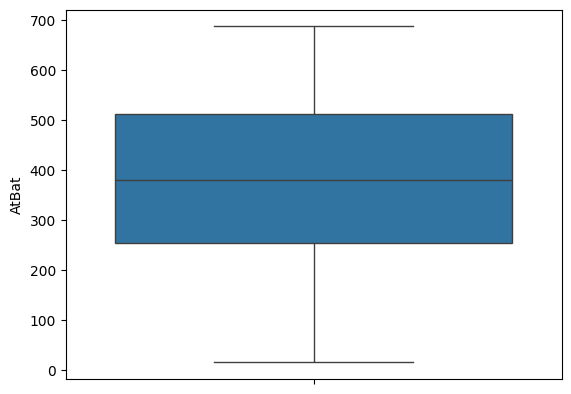

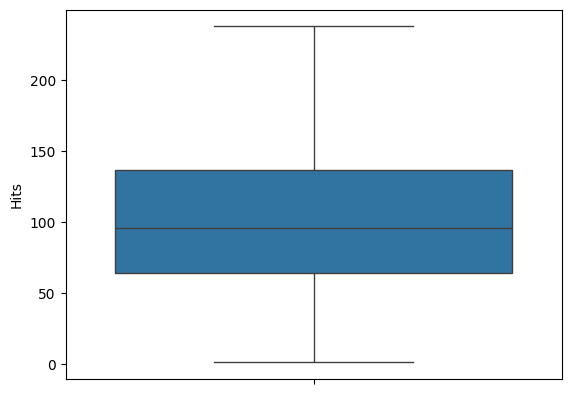

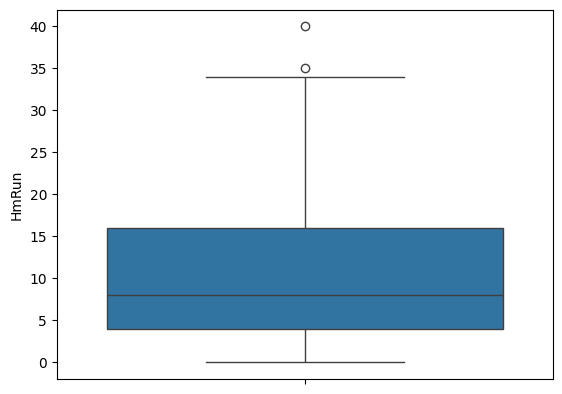

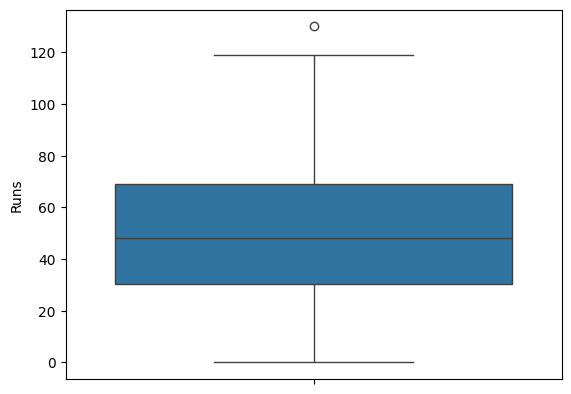

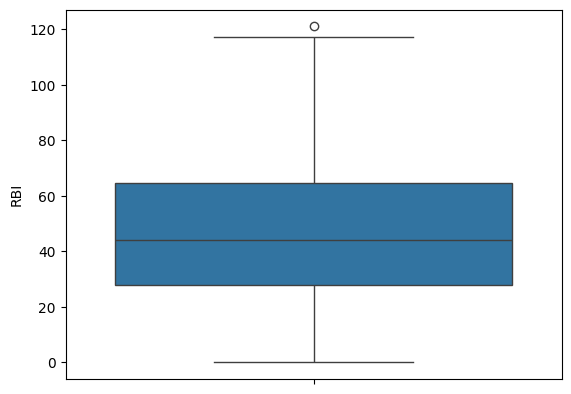

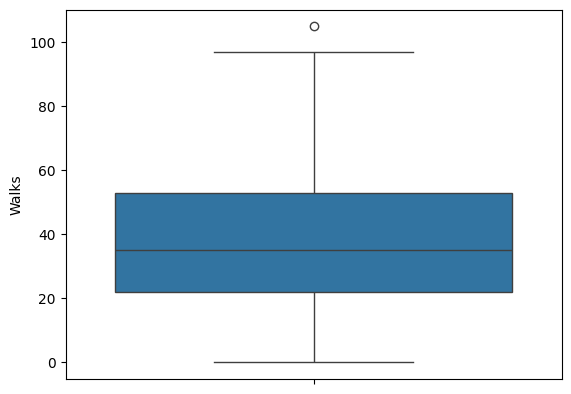

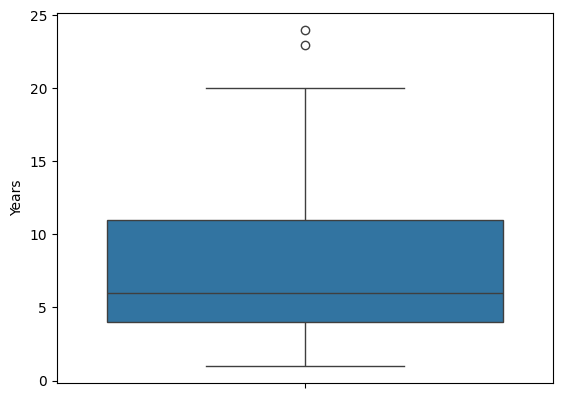

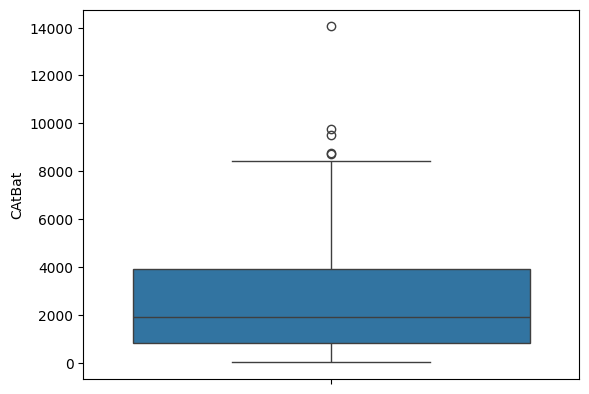

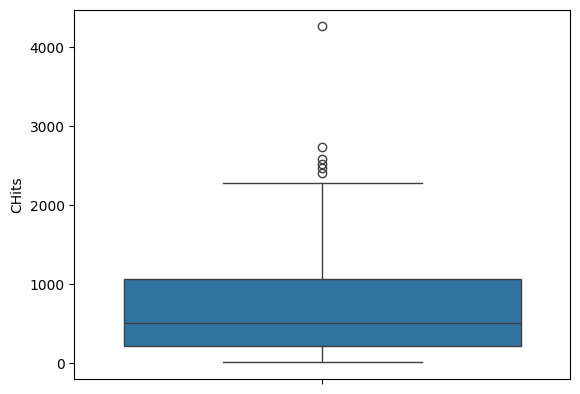

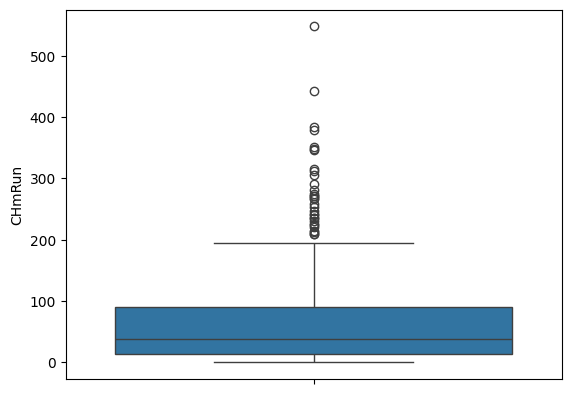

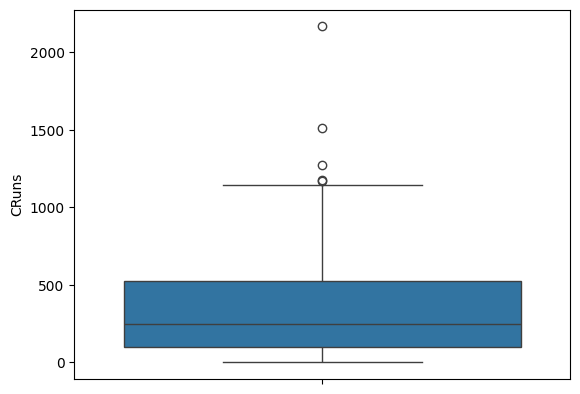

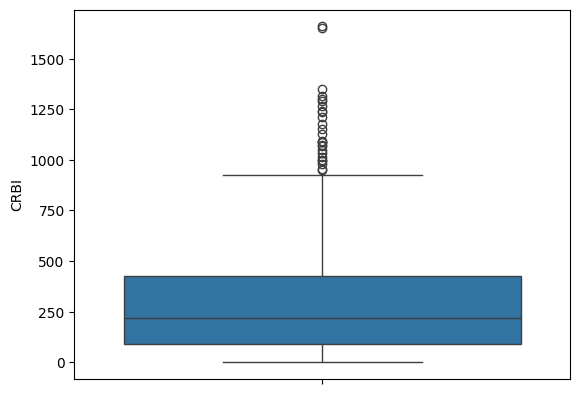

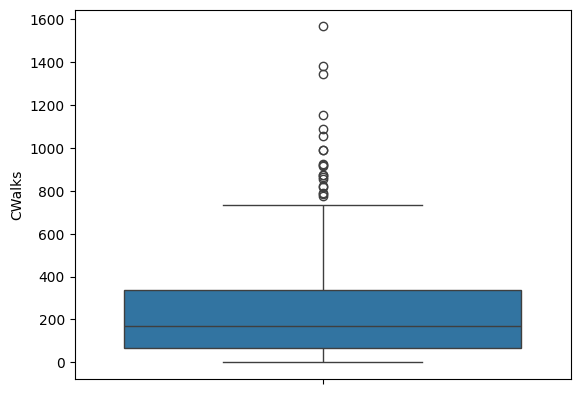

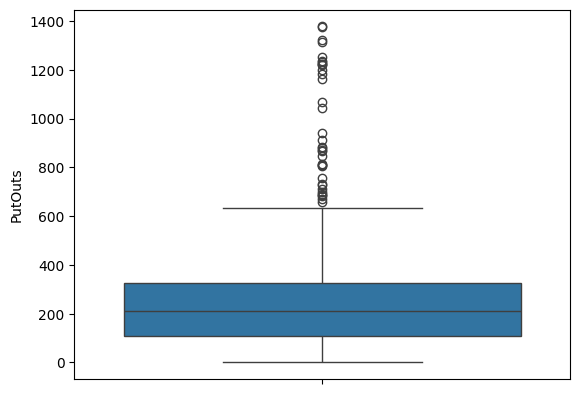

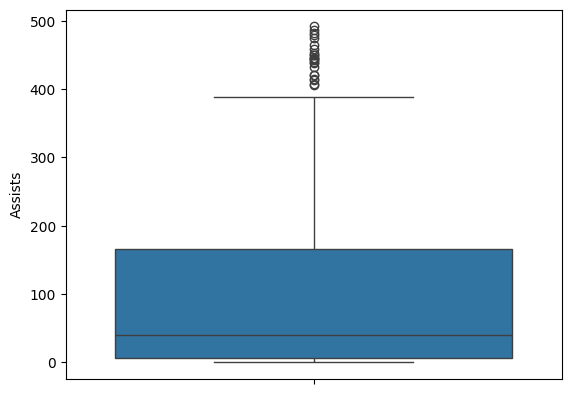

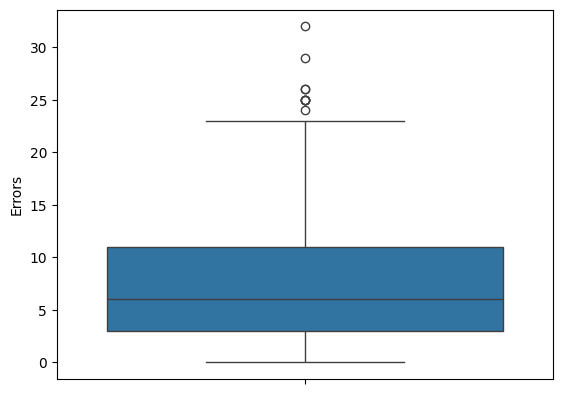

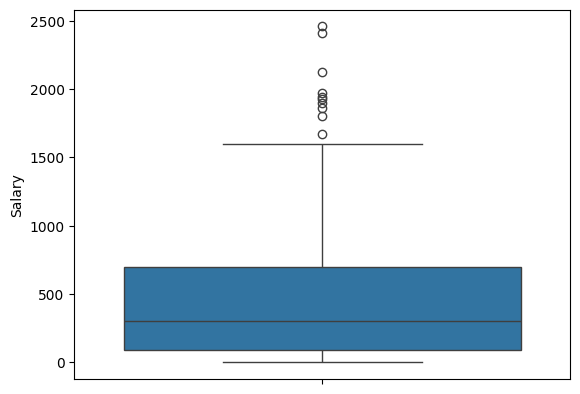

In [59]:
for i in num_cols:
  sns.boxplot(df[i])
  plt.show()

In [63]:
cols=num_cols.drop('Salary')
def manage_outliers(df,cols):
  q1=df[cols].quantile(0.25)
  q3=df[cols].quantile(0.75)
  iqr=q3-q1
  lower=q1-1.5*iqr
  upper=q3+1.5*iqr
  df[cols]=np.where(df[cols]>upper,upper,np.where(df[cols]<lower,lower,df[cols]))
  return df
df=manage_outliers(df,cols)

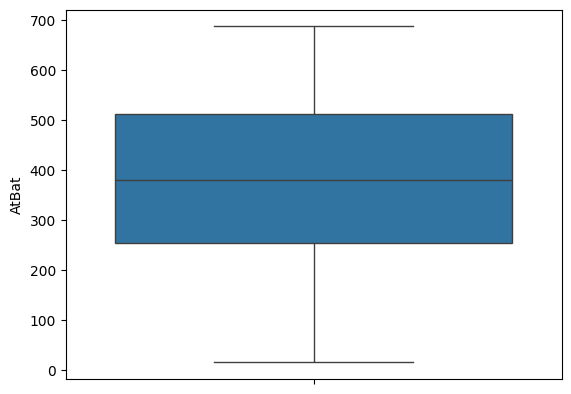

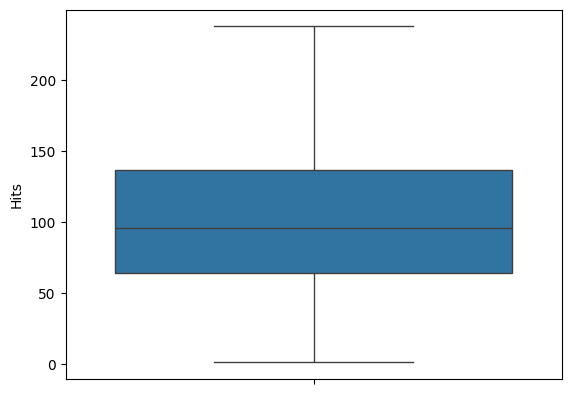

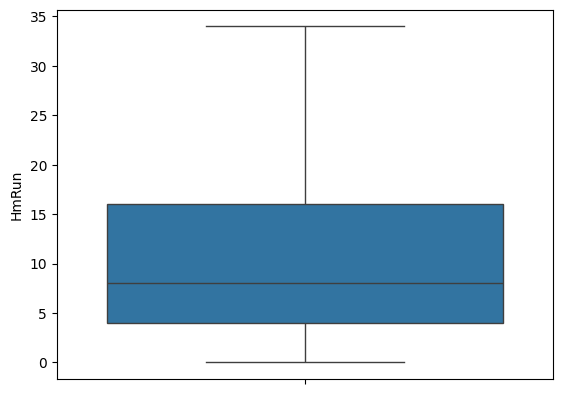

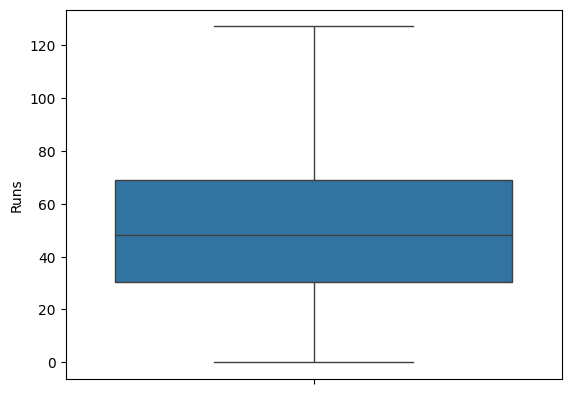

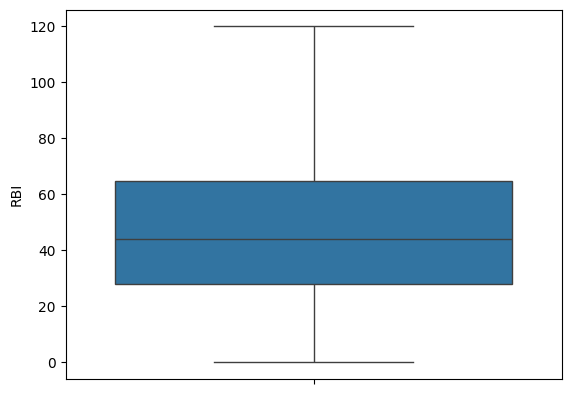

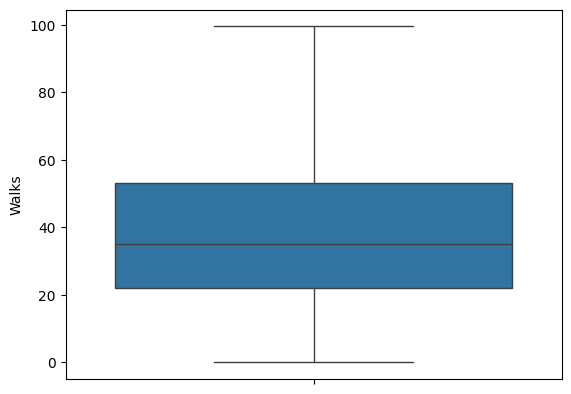

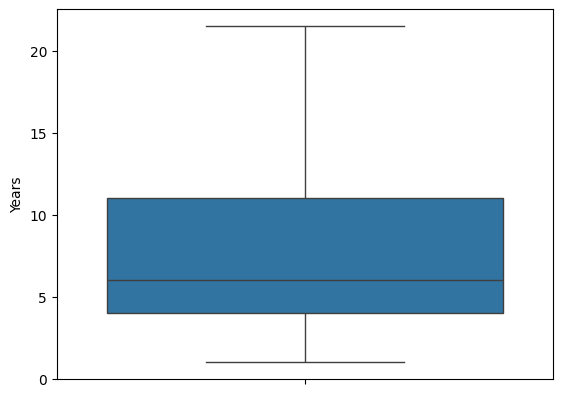

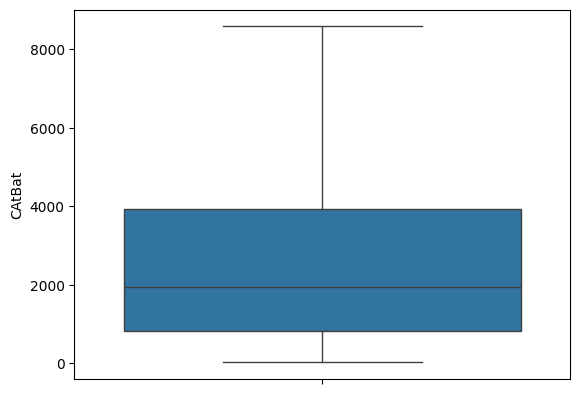

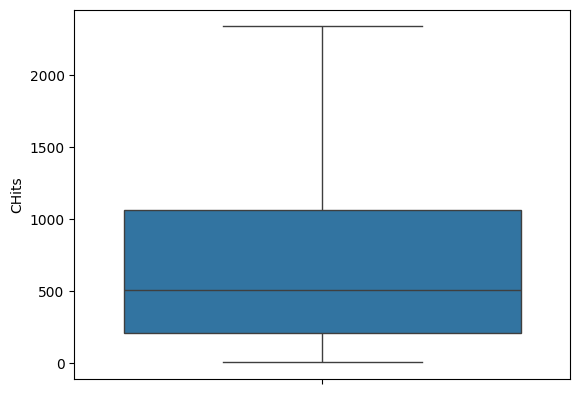

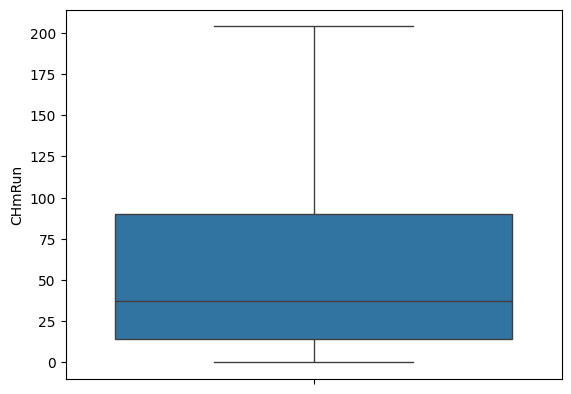

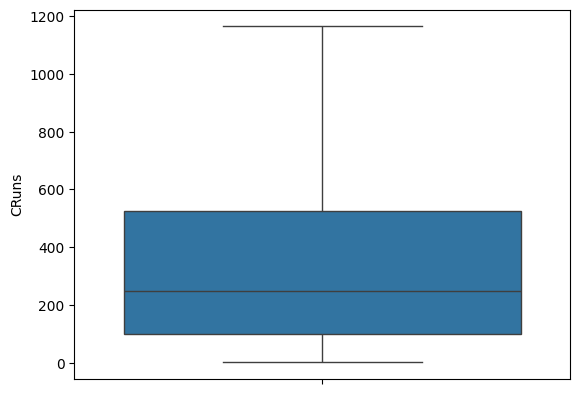

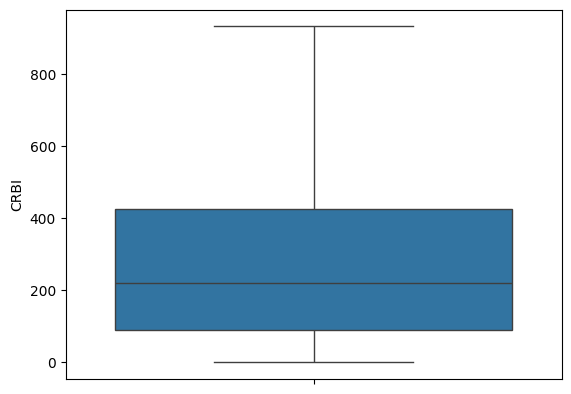

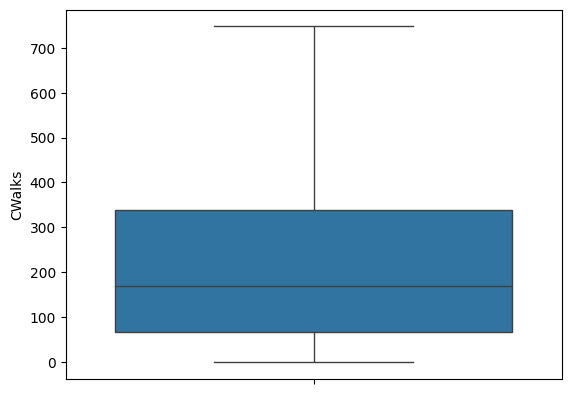

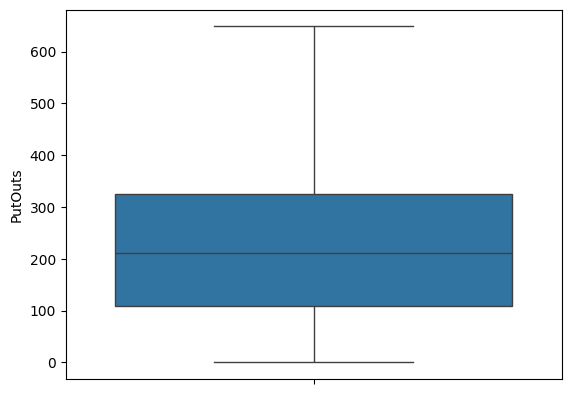

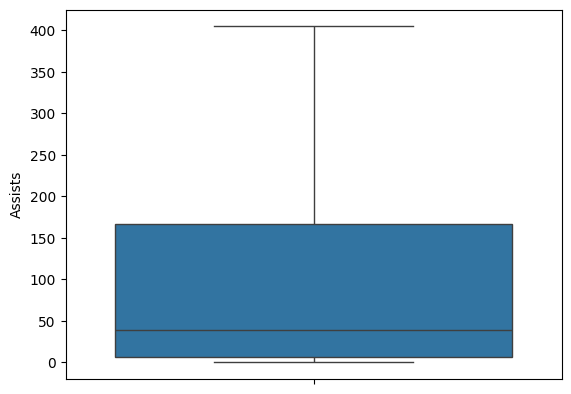

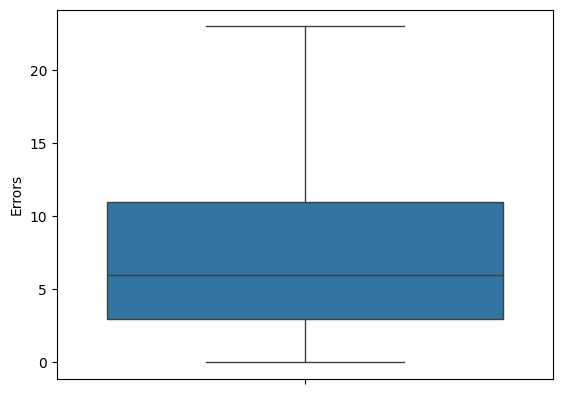

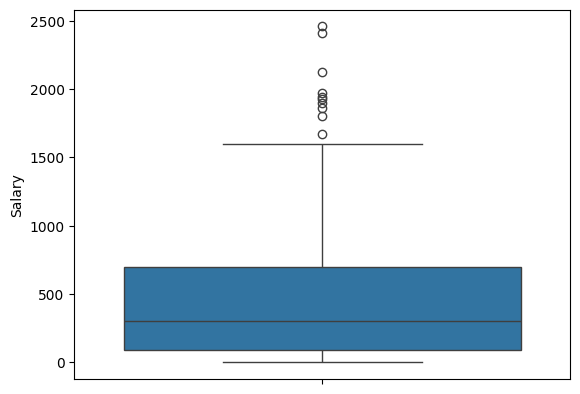

In [64]:
for i in num_cols:
  sns.boxplot(df[i])
  plt.show()

In [65]:
# see here we removed the outliers by capping them between their iqr range

In [66]:
x=df.drop('Salary',axis=1)
y=df['Salary']

In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [68]:
num_cols

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'Salary'],
      dtype='object')

In [69]:
# in the transformation we have to apply on all the numerical columns except the target variable
num_cols=num_cols.drop('Salary')

In [70]:
trf1=ColumnTransformer([
    ('cat_converter',OneHotEncoder(sparse_output=False,drop='first'),cat_cols),
    ('powertrans',PowerTransformer(method='yeo-johnson'),num_cols)
],remainder='passthrough',verbose_feature_names_out=False).set_output(transform='pandas')

In [71]:
trf3=DecisionTreeRegressor()

In [72]:
pipe=Pipeline([
    ('trf1',trf1),
    ('trf3',trf3)
])

In [73]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_converter',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  Index(['League', 'Division', 'NewLeague'], dtype='object')),
                                                 ('powertrans',
                                                  PowerTransformer(),
                                                  Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('trf3', DecisionTreeRegressor())])

In [74]:
y_pred=pipe.predict(x_test)

In [75]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

-0.003755220048465624
